In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/IndraniMandal/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Cloning into 'ds-assets'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 205 (delta 54), reused 50 (delta 50), pack-reused 147 (from 1)
Receiving objects: 100% (205/205), 12.58 MiB | 5.04 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [2]:
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(home+"tennis_numeric.csv")
df.head()

,outlook_sunny,outlook_overcast,outlook_rainy,temperature,humidity,windy,play
0,1,0,0,85,85,0,no
1,1,0,0,80,90,1,no
2,0,1,0,83,86,0,yes
3,0,0,1,70,96,0,yes
4,0,0,1,68,80,0,yes


In [4]:
features_df = df.drop(['outlook_sunny','play'],axis=1)
features_df.head()

,outlook_overcast,outlook_rainy,temperature,humidity,windy
0,0,0,85,85,0
1,0,0,80,90,1
2,1,0,83,86,0
3,0,1,70,96,0
4,0,1,68,80,0


In [5]:
target_df = pd.DataFrame(df['play'])
target_df.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


In [6]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
dtree.fit(features_df,target_df)


DecisionTreeClassifier(criterion='entropy')

In [8]:
tree_print(dtree,features_df)

if outlook_overcast =< 0.5: 
  |then if humidity =< 82.5: 
  |  |then if temperature =< 66.5: 
  |  |  |then no
  |  |  |else yes
  |  |else if temperature =< 70.5: 
  |  |  |then yes
  |  |  |else no
  |else yes
<------->
Tree Depth:  3


In [9]:
target_df['play'].unique()

array(['no', 'yes'], dtype=object)

[Ellipsis]

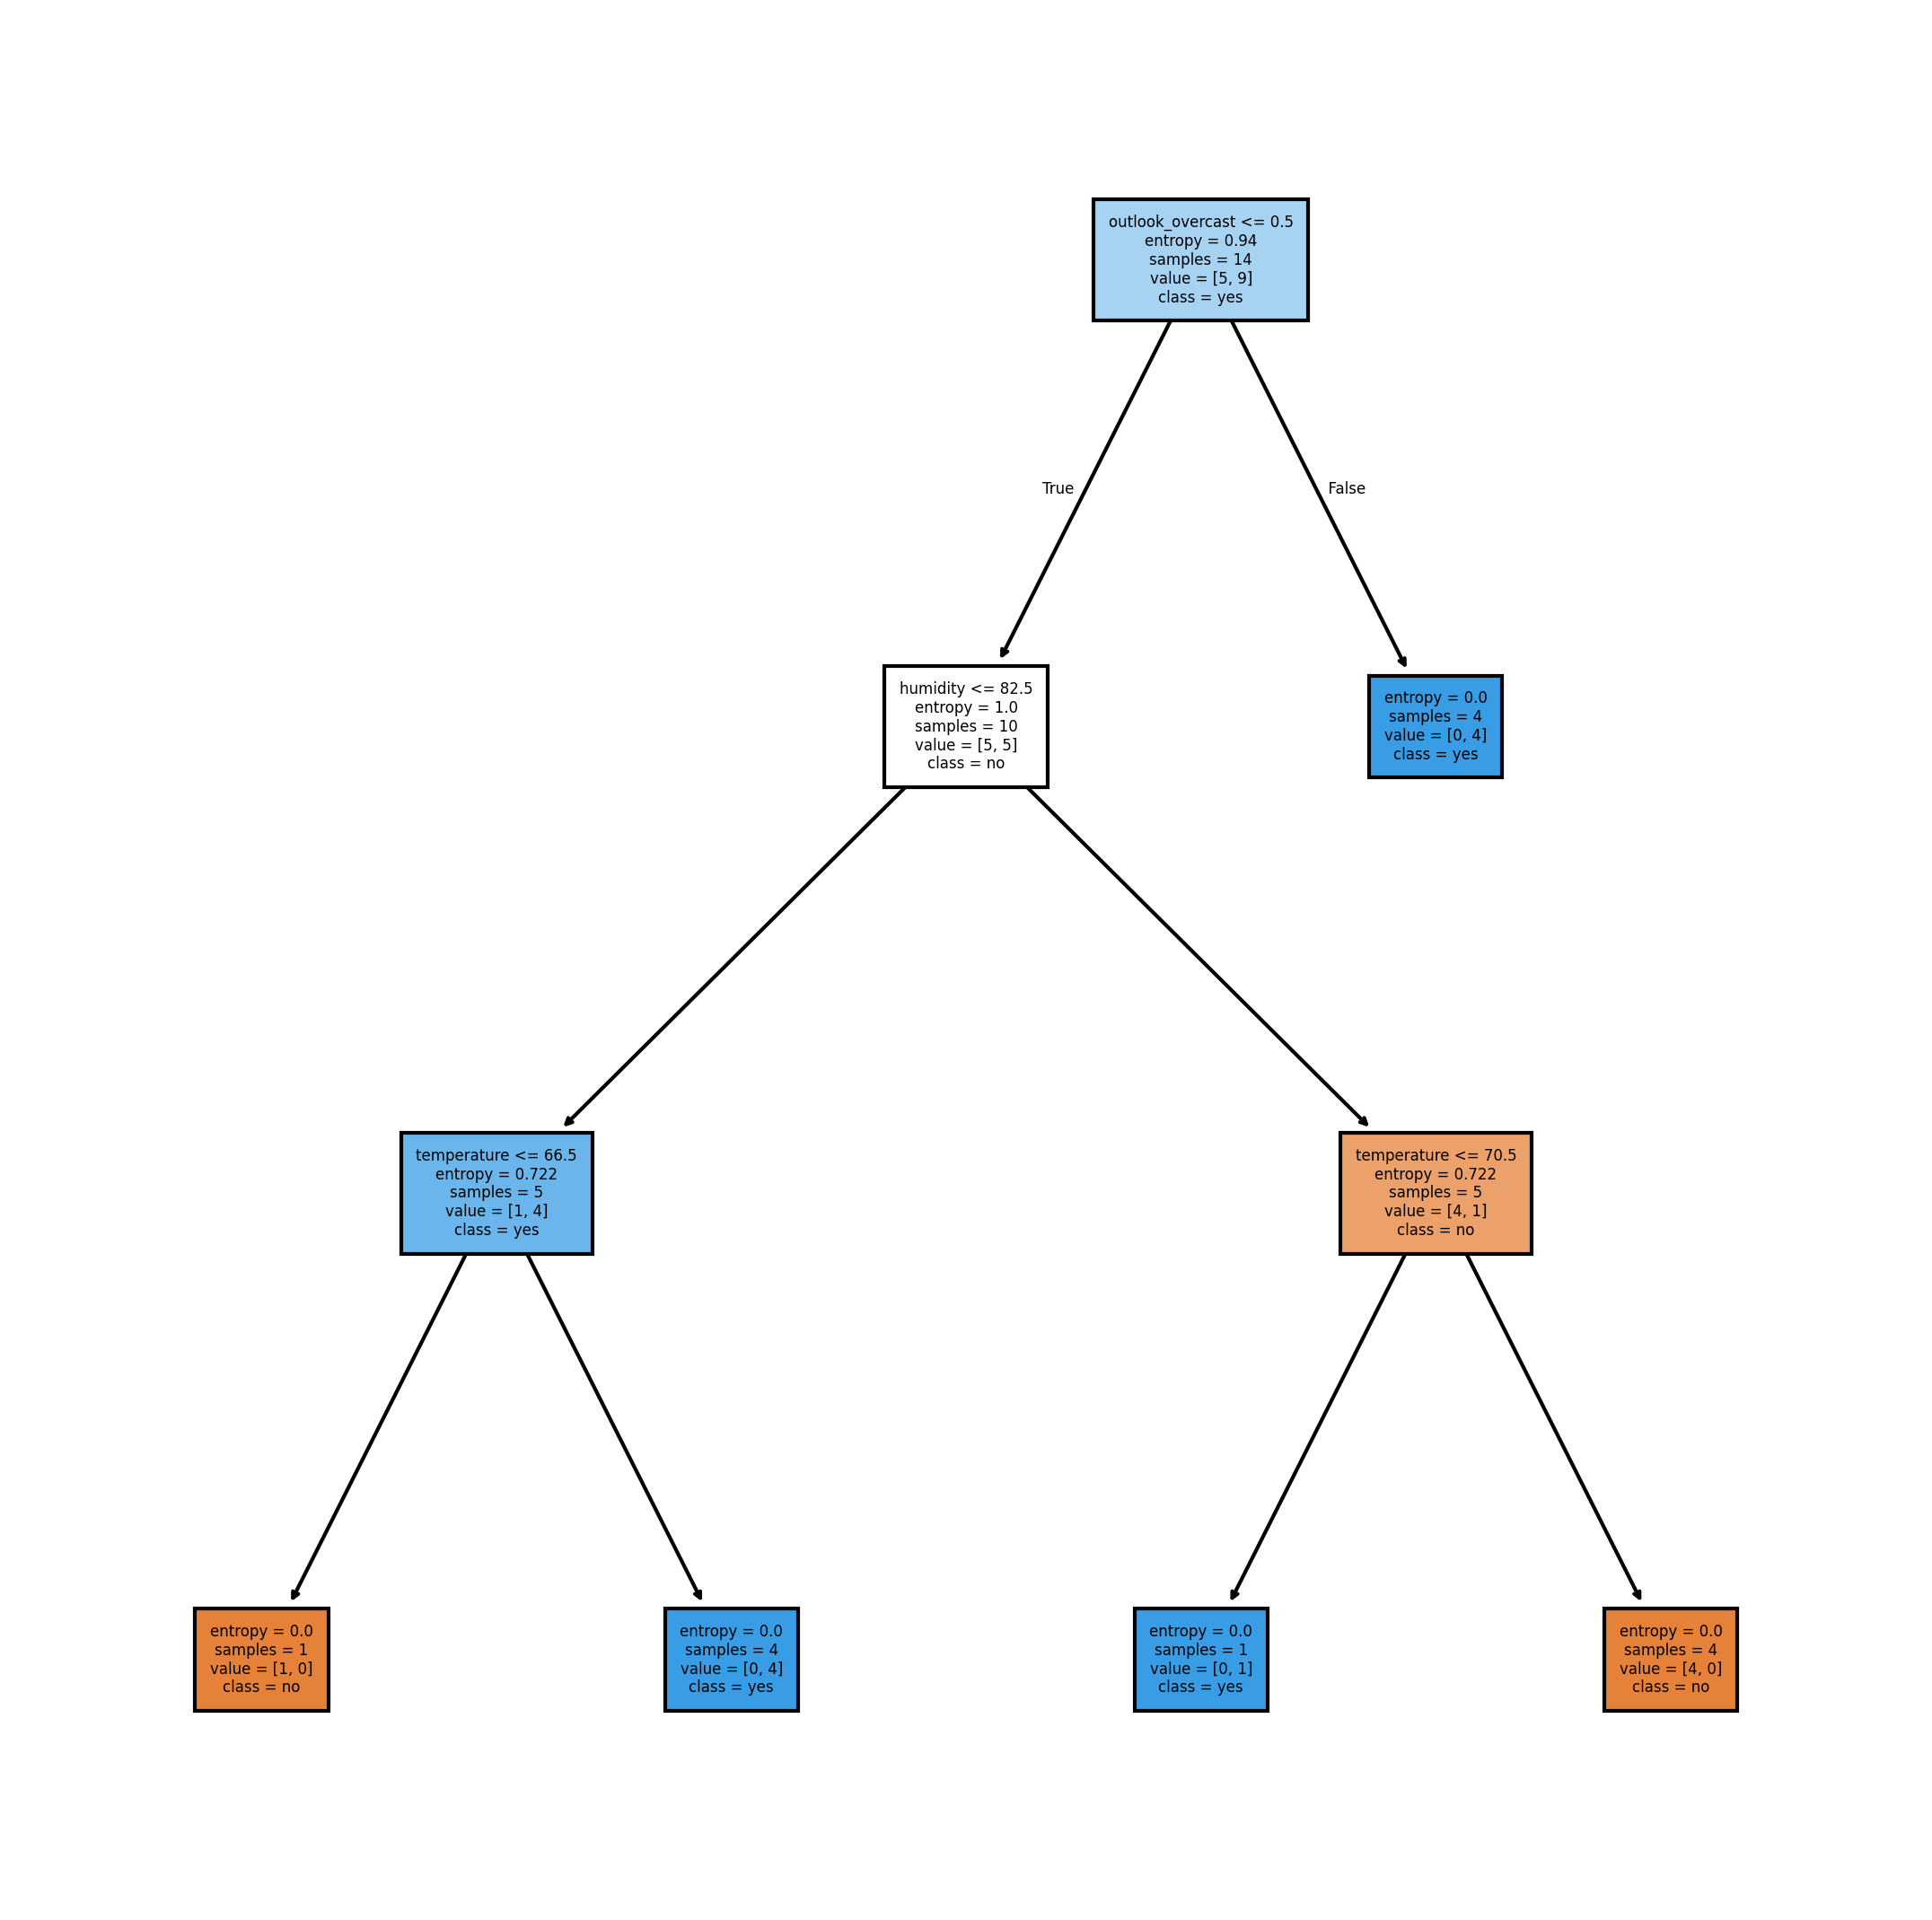

In [10]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['play'].unique()))
[...]

**Printed out decision tree**

In [11]:
predict_array = dtree.predict(features_df)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['play']

In [12]:
predicted_labels.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


In [13]:
target_df.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


**This helps show that I can relate the patterns my model uncovered back to the data**

In [14]:
predicted_labels.equals(target_df)

True

**Showing how accurate my model is**

In [15]:
from sklearn.metrics import accuracy_score

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels)))

Our model accuracy is: 1.0


In [16]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [17]:
tree_print(dtree2,features_df)

if outlook_overcast =< 0.5: 
  |then if humidity =< 82.5: 
  |  |then yes
  |  |else no
  |else yes
<---->
Tree Depth:  2


[Ellipsis]

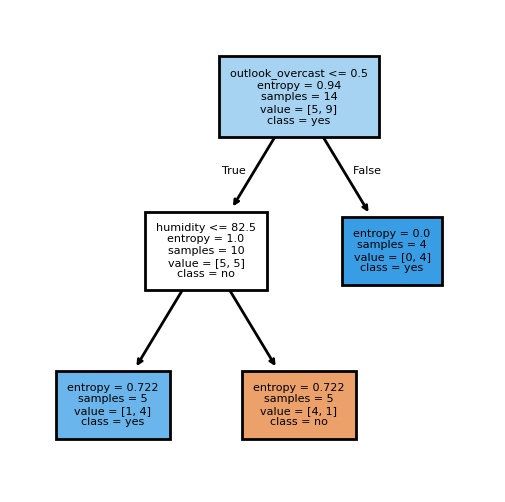

In [18]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=200)
plot_tree(dtree2, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['play'].unique()))
[...]

**Restricting the complexity of my model to obtain very readable and understandable models without sacrificing a lot of accuracy**

In [19]:
predict_array2 = dtree2.predict(features_df)
predicted_labels2 = pd.DataFrame(predict_array2)
predicted_labels2.columns = ['play']

print("Our model accuracy is: {}".format(accuracy_score(target_df, predicted_labels2)))

Our model accuracy is: 0.8571428571428571


In [20]:
import pandas as pd
# Compare the predicted labels with the actual target labels
comparison_df = pd.concat([target_df, predicted_labels], axis=1)
comparison_df.columns = ['Actual Play', 'Predicted Play']

print(comparison_df)

# Checking where the cases where the prediction is incorrect
incorrect_predictions = comparison_df[comparison_df['Actual Play'] != comparison_df['Predicted Play']]

if not incorrect_predictions.empty:
  print("\nIncorrect Predictions:")
  print(incorrect_predictions)

else:
  print("\nNo incorrect predictions found.")


   Actual Play Predicted Play
0           no             no
1           no             no
2          yes            yes
3          yes            yes
4          yes            yes
5           no             no
6          yes            yes
7           no             no
8          yes            yes
9          yes            yes
10         yes            yes
11         yes            yes
12         yes            yes
13          no             no

No incorrect predictions found.


Question:Can you relate the patterns the model uncovered back to the data?

Answer: I can relate the patterns the model uncovered back to the data because no incorrect predictions were found and also examining the decision tree itself and the predictions

Examining the decision tree's structure, feature importance, and predictions in relation to the original data allowed me to relate the patterns the model uncovered to the inherent relationships within the dataset. The perfect accuracy in my example  indicates that the model has successfully captured the underlying patterns that dictate whether to play tennis based on given conditions.